# Assignment 1 - Part 2

Evaluation of retrieval results.

In [9]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

RANKING_FILE = "data/mlm_test.txt"  # file with mlm the document rankings
QRELS_FILE = "data/qrels2.csv"  # file with the relevance judgments (ground truth)  
RANKING_FILE_2 = "data/baseline.txt" #  file with bm25 default rankings

**TODO** Complete the function that calculates evaluation metrics for a given a ranking (`ranking`) against the ground truth (`gt`). It should return the results as a dictionary, where the key is the retrieval metric.

(Hint: see [Task 1 of Practicum 2](https://github.com/kbalog/uis-dat630-fall2017/blob/master/practicum/practicum-2/solutions/1_Eval_binary.ipynb).)

In [10]:
def eval_query(ranking, gt):

    # TODO 
    p10, ap, rr, num_rel= 0, 0, 0, 0 
    list_ap = []
    for i, doc_id in enumerate(ranking):
        if doc_id in gt:  # doc is relevant
            num_rel += 1  
            pi = num_rel / (i + 1)  # P@i
            ap += pi  # AP
            ap_2 = ap
            ap_2 /= len(gt)
            
            if i < 10:  # P@10
                p10 += 1
            if rr == 0:  # Reciprocal rank
                rr = 1 / (i + 1)
            list_ap.append(ap_2)

    p10 /=10
    ap /= len(gt)
    

    return {"P10": p10, "AP": ap, "RR": rr, "list": list_ap}


    

Function that evaluates an output file, which contains rankings for a set of queries.

**TODO** It is almost complete, you just need to add the computation of mean scores (over the entire query set).

In [11]:
def eval(gt_file, output_file, output_file_2):
    # load data from ground truth file
    gt = {}  # holds a list of relevant documents for each queryID
    with open(gt_file, "r") as fin:
        header = fin.readline().strip()
        if header != "queryID,docIDs":
            raise Exception("Incorrect file format!")
        for line in fin.readlines():
            qid, docids = line.strip().split(",")
            gt[qid] = docids.split()
            
    # load data from output file
    output = {}
    with open(output_file, "r") as fin:
        header = fin.readline().strip()
        if header != "QueryId,DocumentId":
            raise Exception("Incorrect file format!")
        for line in fin.readlines():
            qid, docid = line.strip().split(",")
            if qid not in output:
                output[qid] = []
            output[qid].append(docid)
            
    # load data from second output
    output2 = {}
    with open(output_file_2, "r") as fin:
        header = fin.readline().strip()
        if header != "QueryId,DocumentId":
            raise Exception("Incorrect file format!")
        for line in fin.readlines():
            qid, docid = line.strip().split(",")
            if qid not in output2:
                output2[qid] = []
            output2[qid].append(docid)
            
    
    # evaluate each query that is in the ground truth
    print("  QID  P@10   (M)AP  (M)RR")
    sum_p10, sum_ap, sum_rr, length = 0, 0, 0, 0
    sum_p10_2, sum_ap_2, sum_rr_2 = 0, 0, 0
    x = {}
    for qid in sorted(gt.keys()):
        res = eval_query(output.get(qid, []), gt.get(qid, []))
        res2 = eval_query(output2.get(qid, []), gt.get(qid, []))
        deltaAP = (res["AP"])-(res2["AP"])
        x[qid] = deltaAP
        print("%5s %6.3f %6.3f %6.3f" % (qid, res["P10"], res["AP"], res["RR"]))
#         print("%5s %6.3f %6.3f %6.3f" % (qid, res2["P10"], res2["AP"], res2["RR"]))
        sum_p10 += res["P10"]
        sum_ap += res["AP"]
        sum_rr += res["RR"]
        sum_p10_2 += res2["P10"]
        sum_ap_2 += res2["AP"]
        sum_rr_2 += res2["RR"]
        length += 1
#         print("%5s %1s %6.3f" % ("Delta AP:",qid, deltaAP))
    
    # TODO compute averages over the entire query set
    sum_p10 = sum_p10/length
    sum_ap = sum_ap/length
    sum_rr = sum_rr/length
    
    sum_p10_2 = sum_p10_2/length
    sum_ap_2 = sum_ap_2/length
    sum_rr_2 = sum_rr_2/length
    
    
    # print averages
    print("%5s %6.3f %6.3f %6.3f" % ("ALL", sum_p10, sum_ap, sum_rr))
#     print("%5s %6.3f %6.3f %6.3f" % ("ALL", sum_p10_2, sum_ap_2, sum_rr_2))
    
   
    
    #plot graph
    

    plt.hist(list(x.values()), bins=[-1, -0.5, -0.25, -0.05, 0.05, 0.25, 0.5,  1])
    
    plt.show()
    plt.figure(figsize=(20, 8))
    plt.bar(range(len(x)), sorted(list(x.values()), reverse=True))
    plt.xticks(range(len(x)), sorted(x, key=x.get, reverse=True))
    plt.show()
    
   
    

### Main

  QID  P@10   (M)AP  (M)RR
  303  0.400  0.234  1.000
  307  0.000  0.013  0.040
  310  0.100  0.022  0.200
  314  0.000  0.000  0.000
  322  0.000  0.002  0.048
  325  0.000  0.000  0.000
  330  0.000  0.000  0.000
  336  0.200  0.173  0.500
  341  0.100  0.033  0.111
  344  0.000  0.000  0.000
  347  0.400  0.053  1.000
  353  0.000  0.000  0.000
  354  0.400  0.007  0.250
  362  0.600  0.227  1.000
  363  0.500  0.050  1.000
  367  0.000  0.023  0.059
  372  0.000  0.000  0.000
  374  0.600  0.261  1.000
  383  0.300  0.065  1.000
  389  0.000  0.000  0.000
  393  0.200  0.066  0.200
  399  0.700  0.086  0.500
  401  0.100  0.014  1.000
  404  0.100  0.027  0.200
  408  0.100  0.007  0.143
  409  0.300  0.096  1.000
  416  0.300  0.180  1.000
  419  0.000  0.008  0.083
  426  0.200  0.127  1.000
  427  0.800  0.578  1.000
  433  0.300  0.174  1.000
  435  0.000  0.017  0.077
  436  0.100  0.017  0.200
  439  0.000  0.002  0.043
  443  0.300  0.069  0.500
  448  0.000  0.001  0.032
 

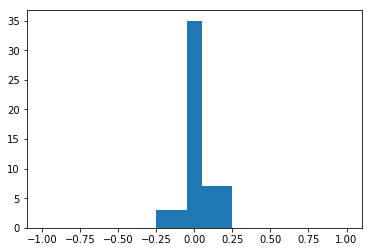

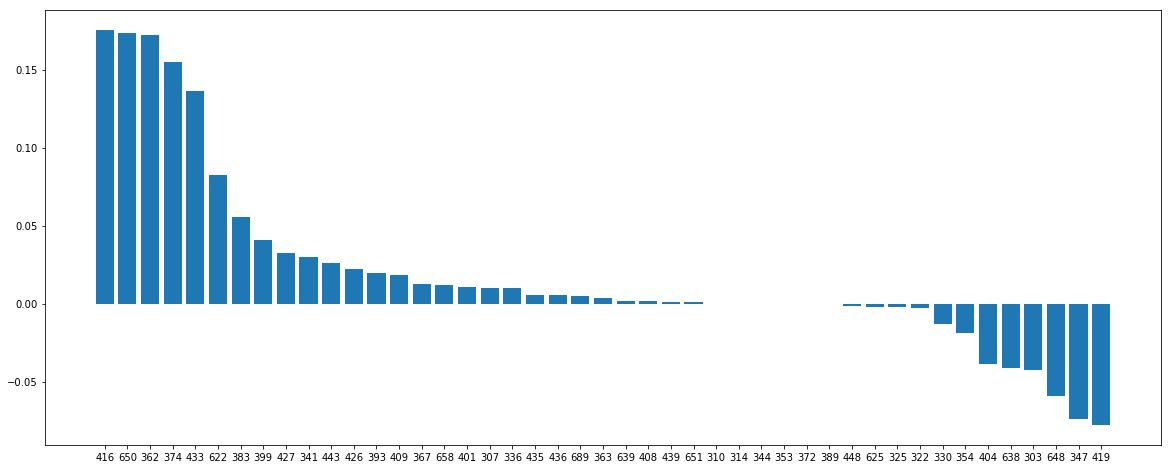

In [12]:
eval(QRELS_FILE, RANKING_FILE, RANKING_FILE_2)





